<a href="https://colab.research.google.com/github/pctablet505/keras/blob/master/Model_Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pre-commit
%cd /content/
%rm -r keras_repo/
%rm -r keras_hub_repo/

!git clone https://github.com/pctablet505/keras.git keras_repo
%cd /content/keras_repo
!git checkout model-pruning
!bash /content/keras_repo/shell/api_gen.sh
%pip install -e .

# %cd /content
# !git clone https://github.com/pctablet505/keras-hub.git keras_hub_repo
# %cd /content/keras_hub_repo
# !git checkout model-pruning
# %pip install -e .
# %cd /content

/content
rm: cannot remove 'keras_hub_repo/': No such file or directory
Cloning into 'keras_repo'...
remote: Enumerating objects: 97462, done.
remote: Counting objects: 100% (354/354), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 97462 (delta 274), reused 145 (delta 144), pack-reused 97108 (from 3)
Receiving objects: 100% (97462/97462), 46.82 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (76881/76881), done.
/content/keras_repo
Branch 'model-pruning' set up to track remote branch 'model-pruning' from 'origin'.
Switched to a new branch 'model-pruning'
Generating api directory with public APIs...
2025-08-18 04:52:58.601821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755492778.622187    4059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already b

In [ ]:
%cd /content

/content


# Task
Clone the branch "https://github.com/keras-team/keras/compare/master...pctablet505:keras:model-pruning", install it with pip, and then write code to create a classifier on top of a ResNet50 backbone using Keras 3, and evaluate it on the CIFAR-100 dataset.

## Load and preprocess data

### Subtask:
Load the CIFAR-100 dataset and preprocess it for use with the ResNet50 model.


**Reasoning**:
The subtask requires loading and preprocessing the CIFAR-100 dataset using Keras. This involves importing the dataset, loading the data, normalizing the images, and one-hot encoding the labels. These steps can be combined into a single code block.



In [1]:
from keras.datasets import cifar100
from keras.utils import to_categorical

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("CIFAR-100 dataset loaded and preprocessed.")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

CIFAR-100 dataset loaded and preprocessed.
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 100)


## Load the resnet50 model

### Subtask:
Load the pre-trained ResNet50 model without the top classification layer.


**Reasoning**:
Import the ResNet50 model and load it with pre-trained weights and without the top classification layer.



In [ ]:
from keras.applications import ResNet50

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape= (128, 128, 3))
base_model.trainable = True

print("ResNet50 base model loaded.")
print(f"Base model output shape: {base_model.output_shape}")

ResNet50 base model loaded.
Base model output shape: (None, 4, 4, 2048)


## Build the classifier model

### Subtask:
Add a global average pooling layer and a dense classification layer on top of the ResNet50 backbone.


**Reasoning**:
Add the classification layers on top of the ResNet50 base model and create the final model.



In [ ]:
from keras.layers import GlobalAveragePooling2D, Dense, Input, UpSampling2D, Conv2D, BatchNormalization
from keras.models import Model

# Get the output tensor from the base_model
inputs = Input(shape=(32, 32, 3))
x = UpSampling2D(size=(4,4))(inputs)
x = base_model(x)

# x = Conv2D(filters=256, kernel_size=(3,3), strides=(2,2))(x)

# Add a GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)

predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=inputs, outputs=predictions)

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,138,980 (92.08 MB)

 Trainable params: 24,085,348 (91.88 MB)

 Non-trainable params: 53,632 (209.50 KB)

In [ ]:
# base_model.summary()
model.load_weights("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

ValueError: A total of 1 objects could not be loaded. Example error message for object <BatchNormalization name=batch_normalization, built=True>:

Layer 'batch_normalization' expected 4 variables, but received 0 variables during loading. Expected: ['gamma', 'beta', 'moving_mean', 'moving_variance']

List of objects that could not be loaded:
[<BatchNormalization name=batch_normalization, built=True>]

## Compile the model

### Subtask:
Compile the model with an appropriate optimizer, loss function, and metrics.


**Reasoning**:
Compile the model with the specified optimizer, loss function, and metrics.



In [ ]:
from keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy

# Choose and instantiate the optimizer
optimizer = Adam(learning_rate=1e-4, )

# Choose and instantiate the loss function
loss_fn = CategoricalCrossentropy()

# Choose and instantiate the metric
metrics = [CategoricalAccuracy()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

print("Model compiled successfully.")

Model compiled successfully.


## Train the model

### Subtask:
Train the model on the preprocessed CIFAR-100 training data.


**Reasoning**:
Train the compiled model using the fit method on the training data and validate on the test data.



In [ ]:
from keras.callbacks import EarlyStopping

epochs = 200
# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test),batch_size=800, callbacks=[early_stopping])

print(f"Model trained for {epochs} epochs.")

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - categorical_accuracy: 0.3758 - loss: 2.7659 - val_categorical_accuracy: 0.0099 - val_loss: 4.7074
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - categorical_accuracy: 0.7463 - loss: 0.9840 - val_categorical_accuracy: 0.0103 - val_loss: 4.8237
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - categorical_accuracy: 0.9000 - loss: 0.4333 - val_categorical_accuracy: 0.0100 - val_loss: 5.0798
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - categorical_accuracy: 0.9775 - loss: 0.1587 - val_categorical_accuracy: 0.0100 - val_loss: 5.1278
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - categorical_accuracy: 0.9965 - loss: 0.0558 - val_categorical_accuracy: 0.0117 - val_loss: 5.3401
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - categorical_accuracy: 0.9991 - loss: 0.0250 - val_categorical_accuracy: 0.0146 - val_loss: 5.3616
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 252ms/step - categorical_accuracy: 

## Evaluate the model

### Subtask:
Evaluate the trained model on the preprocessed CIFAR-100 test data.

**Reasoning**:
Evaluate the trained model on the test dataset using the `evaluate` method.

In [ ]:
model.metrics

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0,)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.1207
Test Accuracy: 0.7420


# Task
Save the trained Keras model, load it, evaluate the loaded model, prune the loaded model, and evaluate the pruned model.

## Save the model

### Subtask:
Save the trained model to a file.


**Reasoning**:
Save the trained Keras model to a file.



In [ ]:
# model.save("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")
# print("Model saved successfully.")

Model saved successfully.


## Load the model

### Subtask:
Load the saved model from the file.


**Reasoning**:
Load the saved Keras model from the file using `load_model`.



In [2]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning


ImportError: cannot import name 'PruningConfig' from 'keras.pruning' (/content/keras_repo/keras/api/pruning/__init__.py)

In [ ]:

# Load the saved model
loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

print("Model loaded successfully.")

# Evaluate the loaded model on the test data
loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

Model loaded successfully.
Loaded Model Test Loss: 1.5565
Loaded Model Test Accuracy: 0.5668


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# config = PruningConfig(sparsity=0.1, method="l1") # Old API
stats = loaded_model.prune(sparsity=0.1, method="l1") # New API

loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

Loaded Model Test Loss: 3.6504
Loaded Model Test Accuracy: 0.1479


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# config = PruningConfig(sparsity=0.3, method="l1") # Old API
stats = loaded_model.prune(sparsity=0.3, method="l1") # New API

loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

Loaded Model Test Loss: 3.7006
Loaded Model Test Accuracy: 0.1382


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# config = PruningConfig(sparsity=0.5, method="l1") # Old API
stats = loaded_model.prune(sparsity=0.5, method="l1") # New API

loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

Loaded Model Test Loss: 3.7443
Loaded Model Test Accuracy: 0.1329


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# config = PruningConfig(sparsity=0.7, method=LnPruning(n=4)) # Old API
stats = loaded_model.prune(sparsity=0.7, method=LnPruning(n=4)) # New API

loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

Loaded Model Test Loss: 3.8623
Loaded Model Test Accuracy: 0.1145


In [ ]:
loaded_model.loss

<LossFunctionWrapper(<function categorical_crossentropy at 0x7df2e0280ea0>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# config = PruningConfig(sparsity=0.7, method="saliency",dataset=(x_train, y_train),loss_fn=loaded_model.loss) # Old API
stats = loaded_model.prune(sparsity=0.7, method="saliency", dataset=(x_train, y_train), loss_fn=loaded_model.loss) # New API

loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - categorical_accuracy: 0.1457 - loss: 3.6570
Loaded Model Test Loss: 3.6570
Loaded Model Test Accuracy: 0.1457


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# config = PruningConfig(sparsity=0.7, method="taylor",dataset=(x_train, y_train),loss_fn=loaded_model.loss) # Old API
stats = loaded_model.prune(sparsity=0.7, method="taylor", dataset=(x_train, y_train), loss_fn=loaded_model.loss) # New API

loaded_loss, loaded_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

print(f"Loaded Model Test Loss: {loaded_loss:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - categorical_accuracy: 0.1484 - loss: 3.6519
Loaded Model Test Loss: 3.6519
Loaded Model Test Accuracy: 0.1484


In [ ]:
stats

{'initial_sparsity': 0.00020536343876534775,
 'final_sparsity': 0.699755017773933,
 'pruned_layers': 2,
 'target_sparsity': 0.7,
 'method': 'taylor'}

In [ ]:
with open("/content/PRUNING_DESIGN.md", "r") as f:
  print(f.read())

# Keras Model Pruning: Design Documentation

## Table of Contents
- [Overview](#overview)
- [Architecture](#architecture)
- [Core Components](#core-components)
- [API Design](#api-design)
- [Pruning Methods](#pruning-methods)
- [Layer Selection System](#layer-selection-system)
- [Analysis and Verification Tools](#analysis-and-verification-tools)
- [Usage Examples](#usage-examples)
- [Implementation Details](#implementation-details)
- [Design Decisions](#design-decisions)

## Overview

The Keras Model Pruning system provides a comprehensive framework for reducing neural network model size by removing unnecessary weights while maintaining performance. The system supports multiple pruning algorithms, flexible layer selection, and extensive analysis tools.

### Key Features

- **Multiple Pruning Methods**: L1/L2 magnitude, structured, saliency-based, and Taylor expansion methods
- **Flexible Layer Selection**: Support for exact names, regex patterns, and mixed specifications
- **Direct Par

In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

# Load the saved model
loaded_model_l1_30 = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply L1 pruning with 30% sparsity
# config_l1_30 = PruningConfig(sparsity=0.3, method="l1") # Old API
stats_l1_30 = loaded_model_l1_30.prune(sparsity=0.3, method="l1") # New API

print("\n--- L1 Pruning (30% sparsity) Results ---")
print(f"Initial Sparsity: {stats_l1_30['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_l1_30['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_l1_30['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_l1_30['method']}")
print(f"Pruned Layers: {stats_l1_30['pruned_layers']}")


# Evaluate the pruned model
loss_l1_30, accuracy_l1_30 = loaded_model_l1_30.evaluate(x_test, y_test, verbose=0)
print(f"L1 Pruned Model Test Loss: {loss_l1_30:.4f}")
print(f"L1 Pruned Model Test Accuracy: {accuracy_l1_30:.4f}")


--- L1 Pruning (30% sparsity) Results ---
Initial Sparsity: 0.0002
Final Sparsity: 0.3000
Target Sparsity: 0.3000
Pruning Method: l1
Pruned Layers: 2
L1 Pruned Model Test Loss: 3.7006
L1 Pruned Model Test Accuracy: 0.1382


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

# Load the saved model
loaded_model_l2_50 = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply L2 pruning with 50% sparsity
# config_l2_50 = PruningConfig(sparsity=0.5, method="l2") # Old API
stats_l2_50 = loaded_model_l2_50.prune(sparsity=0.5, method="l2") # New API

print("\n--- L2 Pruning (50% sparsity) Results ---")
print(f"Initial Sparsity: {stats_l2_50['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_l2_50['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_l2_50['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_l2_50['method']}")
print(f"Pruned Layers: {stats_l2_50['pruned_layers']}")

# Evaluate the pruned model
loss_l2_50, accuracy_l2_50 = loaded_model_l2_50.evaluate(x_test, y_test, verbose=0)
print(f"L2 Pruned Model Test Loss: {loss_l2_50:.4f}")
print(f"L2 Pruned Model Test Accuracy: {accuracy_l2_50:.4f}")


--- L2 Pruning (50% sparsity) Results ---
Initial Sparsity: 0.0002
Final Sparsity: 0.4999
Target Sparsity: 0.5000
Pruning Method: l2
Pruned Layers: 2
L2 Pruned Model Test Loss: 3.7443
L2 Pruned Model Test Accuracy: 0.1329


In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

# Load the saved model
loaded_model_structured_40 = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply Structured pruning with 40% sparsity
# config_structured_40 = PruningConfig(sparsity=0.4, method="structured") # Old API
stats_structured_40 = loaded_model_structured_40.prune(sparsity=0.4, method="structured") # New API


print("\n--- Structured Pruning (40% sparsity) Results ---")
print(f"Initial Sparsity: {stats_structured_40['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_structured_40['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_structured_40['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_structured_40['method']}")
print(f"Pruned Layers: {stats_structured_40['pruned_layers']}")

# Evaluate the pruned model
loss_structured_40, accuracy_structured_40 = loaded_model_structured_40.evaluate(x_test, y_test, verbose=0)
print(f"Structured Pruned Model Test Loss: {loss_structured_40:.4f}")
print(f"Structured Pruned Model Test Accuracy: {accuracy_structured_40:.4f}")


--- Structured Pruning (40% sparsity) Results ---
Initial Sparsity: 0.0002
Final Sparsity: 0.4026
Target Sparsity: 0.4000
Pruning Method: structured
Pruned Layers: 2
Structured Pruned Model Test Loss: 3.9227
Structured Pruned Model Test Accuracy: 0.1330


In [3]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

# Load the saved model
loaded_model_saliency_60_selective = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply Saliency pruning with 60% sparsity on layers matching "dense_.*"
dataset_subset = (x_train[:1000], y_train[:1000]) # Use a smaller subset
loss_fn = loaded_model_saliency_60_selective.loss

# config_saliency_60_selective = PruningConfig( # Old API
#     sparsity=0.6,
#     method="saliency",
#     layers_to_prune=["dense_.*"], # Select layers by regex
#     dataset=dataset_subset,
#     loss_fn=loss_fn
# )
stats_saliency_60_selective = loaded_model_saliency_60_selective.prune( # New API
    sparsity=0.6,
    method="saliency",
    layers_to_prune=["dense_.*"], # Select layers by regex
    dataset=dataset_subset,
    loss_fn=loss_fn
)

print("\n--- Saliency Pruning (60% sparsity, selective) Results ---")
print(f"Initial Sparsity: {stats_saliency_60_selective['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_saliency_60_selective['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_saliency_60_selective['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_saliency_60_selective['method']}")
print(f"Pruned Layers: {stats_saliency_60_selective['pruned_layers']}")

# Evaluate the pruned model
loss_saliency_60_selective, accuracy_saliency_60_selective = loaded_model_saliency_60_selective.evaluate(x_test, y_test, verbose=0)
print(f"Saliency Pruned Model Test Loss: {loss_saliency_60_selective:.4f}")
print(f"Saliency Pruned Model Test Accuracy: {accuracy_saliency_60_selective:.4f}")

ImportError: cannot import name 'PruningConfig' from 'keras.pruning' (/content/keras_repo/keras/api/pruning/__init__.py)

In [ ]:
from keras.models import load_model
from keras.pruning import PruningConfig, LnPruning

# Load the saved model
loaded_model_taylor_70_selective = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply Taylor pruning with 70% sparsity on layers matching "conv.*"
dataset_subset = (x_train[:1000], y_train[:1000]) # Use a smaller subset
loss_fn = loaded_model_taylor_70_selective.loss

# config_taylor_70_selective = PruningConfig( # Old API
#     sparsity=0.7,
#     method="taylor",
#     layers_to_prune=["conv.*"], # Select layers by regex
#     dataset=dataset_subset,
#     loss_fn=loss_fn
# )
stats_taylor_70_selective = loaded_model_taylor_70_selective.prune( # New API
    sparsity=0.7,
    method="taylor",
    layers_to_prune=["conv.*"], # Select layers by regex
    dataset=dataset_subset,
    loss_fn=loss_fn
)

print("\n--- Taylor Pruning (70% sparsity, selective) Results ---")
print(f"Initial Sparsity: {stats_taylor_70_selective['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_taylor_70_selective['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_taylor_70_selective['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_taylor_70_selective['method']}")
print(f"Pruned Layers: {stats_taylor_70_selective['pruned_layers']}")

# Evaluate the pruned model
loss_taylor_70_selective, accuracy_taylor_70_selective = loaded_model_taylor_70_selective.evaluate(x_test, y_test, verbose=0)
print(f"Taylor Pruned Model Test Loss: {loss_taylor_70_selective:.4f}")
print(f"Taylor Pruned Model Test Accuracy: {accuracy_taylor_70_selective:.4f}")


--- Taylor Pruning (70% sparsity, selective) Results ---
Initial Sparsity: 0.0002
Final Sparsity: 0.0002
Target Sparsity: 0.7000
Pruning Method: taylor
Pruned Layers: 0
Taylor Pruned Model Test Loss: 3.6502
Taylor Pruned Model Test Accuracy: 0.1477


In [5]:
from keras.models import load_model
from keras.pruning import LnPruning

# Load the saved model
loaded_model_random_80 = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply Random pruning with 80% sparsity
# config_random_80 = PruningConfig(sparsity=0.8, method="random", seed=42) # Old API
stats_random_80 = loaded_model_random_80.prune(sparsity=0.8, method="l1", seed=42) # New API

print("\n--- Random Pruning (80% sparsity) Results ---")
print(f"Initial Sparsity: {stats_random_80['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_random_80['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_random_80['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_random_80['method']}")
print(f"Pruned Layers: {stats_random_80['pruned_layers']}")

# Evaluate the pruned model
loss_random_80, accuracy_random_80 = loaded_model_random_80.evaluate(x_test, y_test, verbose=0)
print(f"Random Pruned Model Test Loss: {loss_random_80:.4f}")
print(f"Random Pruned Model Test Accuracy: {accuracy_random_80:.4f}")

# print("Skipping random pruning test as it is not currently supported.")


--- Random Pruning (80% sparsity) Results ---
Initial Sparsity: 0.0000
Final Sparsity: 0.7991
Target Sparsity: 0.8000
Pruning Method: l1
Pruned Layers: 55
Random Pruned Model Test Loss: 4.9933
Random Pruned Model Test Accuracy: 0.0119


In [6]:
from keras.models import load_model
from keras.pruning import  LnPruning

# Load the saved model
loaded_model_ln4_50 = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

# Apply Ln pruning (n=4) with 50% sparsity
# config_ln4_50 = PruningConfig(sparsity=0.5, method=LnPruning(n=4)) # Old API
stats_ln4_50 = loaded_model_ln4_50.prune(sparsity=0.5, method=LnPruning(n=4)) # New API


print("\n--- Ln Pruning (n=4, 50% sparsity) Results ---")
print(f"Initial Sparsity: {stats_ln4_50['initial_sparsity']:.4f}")
print(f"Final Sparsity: {stats_ln4_50['final_sparsity']:.4f}")
print(f"Target Sparsity: {stats_ln4_50['target_sparsity']:.4f}")
print(f"Pruning Method: {stats_ln4_50['method']}")
print(f"Pruned Layers: {stats_ln4_50['pruned_layers']}")

# Evaluate the pruned model
loss_ln4_50, accuracy_ln4_50 = loaded_model_ln4_50.evaluate(x_test, y_test, verbose=0)
print(f"Ln Pruned Model Test Loss: {loss_ln4_50:.4f}")
print(f"Ln Pruned Model Test Accuracy: {accuracy_ln4_50:.4f}")


--- Ln Pruning (n=4, 50% sparsity) Results ---
Initial Sparsity: 0.0000
Final Sparsity: 0.4994
Target Sparsity: 0.5000
Pruning Method: <keras.src.pruning.pruning_method.LnPruning object at 0x7b0a25f5a910>
Pruned Layers: 55
Ln Pruned Model Test Loss: 2.2994
Ln Pruned Model Test Accuracy: 0.4893


In [ ]:
import keras_hub
import time

In [ ]:
model=keras_hub.models.Llama3CausalLM.from_preset("hf://meta-llama/Llama-3.2-1B",dtype='bfloat16')

In [ ]:
model.generate("what is keras")

'what is keras in machine learning\nMachine learning is the process of building systems that can learn and adapt to change. The machine learning algorithms that are available in Python are: Linear Regression, Logistic Regression, SVM (Support Vector Machine), Decision Tree Classifier and K-Nearest Neighbour Classifier. The following are the steps involved in the process of machine learning. Machine learning is a branch of artificial intelligence which is used to create systems which can make decisions without being programmed to do so. In this article, we will discuss the steps involved in the process of machine learning, the various techniques used in it and some of its important applications. Machine Learning is the branch of Artificial Intelligence that is mainly concerned with the use of computers or other digital machines to perform tasks that require human intelligence to perform them. It involves the use of algorithms and data to create a model that can learn from past data. It 

In [ ]:

start_time = time.time()
for i in range(100):
    model.generate("what is keras")
    print(i)
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time for 100 calls to model.generate: {inference_time:7f} seconds")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Inference time for 100 calls to model.generate: 380.907693 seconds


In [ ]:
stats=model.prune(sparsity=0.7, method="l1")


In [ ]:
stats

{'initial_sparsity': 0.0,
 'final_sparsity': 0.7014274586891306,
 'pruned_layers': 112,
 'target_sparsity': 0.7,
 'method': 'l1',
 'layers_pruned': ['feedforward_output_dense',
  'feedforward_gate_dense',
  'feedforward_intermediate_dense',
  'attention_output',
  'value',
  'key',
  'query',
  'feedforward_output_dense',
  'feedforward_gate_dense',
  'feedforward_intermediate_dense',
  'attention_output',
  'value',
  'key',
  'query',
  'feedforward_output_dense',
  'feedforward_gate_dense',
  'feedforward_intermediate_dense',
  'attention_output',
  'value',
  'key',
  'query',
  'feedforward_output_dense',
  'feedforward_gate_dense',
  'feedforward_intermediate_dense',
  'attention_output',
  'value',
  'key',
  'query',
  'feedforward_output_dense',
  'feedforward_gate_dense',
  'feedforward_intermediate_dense',
  'attention_output',
  'value',
  'key',
  'query',
  'feedforward_output_dense',
  'feedforward_gate_dense',
  'feedforward_intermediate_dense',
  'attention_output',
  

In [ ]:
model.generate("what is keras")

'what is keraslegegeelgevaanggdegegabdizahddeygimgdegyydeyinindaydeyyyyyyinydeydmalialithemyydatyininyyininthemdinagdatatinthinagthatthagthemthatagthagproaginagthdinthemagagatagdagagatatinatagxaginaginagagatcriagagagatagcrileininaginagaginemaginieatinagdininagdeleagleaginagininieiniehiileiinininleleleinatiiagininagdeleagiininagdininleinleleleinemininemleleleleleleemleinininatinagdiininatleatatleleinininininininleininatinleatdeleinleagleleleleileinleinininleininieminleleleininleleleinemininleleatatdleleleatinleinchinlelelechleleininininleleleleleleleinininleleininleleleinlenatleatinleinleinleinatinlelechinlecinleleleleininleleyininleininleininlechchlelelelechinininleclelelelelelelelelelelelelenyleleinncininlechyyyinleinleleyinleleleleininlechkinkchlechinkinlelechyyleleleleleleininininchininleinleleleininlelechinchlelechinlecinininininincinleleleleinleleinleleleleleleleleleininchchinleleininininininkinleleinleinininininchinlekinleinclechchininininkinleinleleleleinleinlelelechylelelekkkle

In [ ]:

start_time = time.time()
for i in range(10):
    model.generate("what is keras")
    print(i)
end_time = time.time()

inference_time = end_time - start_time
print(f"Inference time for 100 calls to model.generate: {inference_time:7f} seconds")

0
1
2
3
4
5
6
7
8
9
Inference time for 100 calls to model.generate: 42.329632 seconds


# Task
Modify the code in the selected cell to add early stopping criteria to the model fit.

## Prune and evaluate in a loop

### Subtask:
Iterate through the pruning configurations, load the model each time, prune it according to the current configuration, and evaluate the pruned model on the test data. Store the results (pruning ratio, method, loss, and accuracy).


**Reasoning**:
Iterate through the defined pruning ratios, load the model for each ratio, prune the loaded model, evaluate it, and store the results.



**Reasoning**:
The previous code failed because `x_test` and `y_test` were not defined in the current scope. I need to reload the CIFAR-100 dataset.



In [ ]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import load_model
import pandas as pd
from keras.pruning import LnPruning

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("CIFAR-100 dataset loaded and preprocessed again.")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Define pruning ratios
pruning_ratios = [i * 0.05 for i in range(1, 19)] + [0.95, 0.97, 0.99]

# Define pruning methods
pruning_methods = ["l1", "l2", LnPruning(n=3), LnPruning(n=4), "saliency", "taylor"]

# Initialize an empty list to store the results
pruning_results = []

# Iterate through each pruning method
for pruning_method in pruning_methods:
  print(f"\n--- Pruning Method: {pruning_method} ---")
  # Iterate through each pruning ratio
  for ratio in pruning_ratios:
      print(f"Processing pruning ratio: {ratio}")

      # Load the saved model
      loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

      # Apply pruning
      try:
          if pruning_method in ["saliency", "taylor"]:
              # Use a smaller subset for gradient-based methods to save time
              dataset_subset = (x_train[:1000], y_train[:1000])
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method, dataset=dataset_subset, loss_fn=loaded_model.loss)
          elif isinstance(pruning_method, str):
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)
          else:
              # Assume it's a PruningMethod instance like LnPruning
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)


          print(f"  Pruning successful. Final sparsity: {stats['final_sparsity']:.4f}")

          # Evaluate the pruned model
          loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

          # Append the results
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method),  # Convert method object to string
              'Test Loss': loss,
              'Test Accuracy': accuracy
          })
          print(f"  Evaluation complete. Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

      except ValueError as e:
          print(f"  Skipping pruning for ratio {ratio} with method '{pruning_method}' due to error: {e}")
          # Optionally store a record indicating failure
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method), # Convert method object to string
              'Test Loss': None,
              'Test Accuracy': None,
              'Error': str(e)
          })


# Convert results to a pandas DataFrame for easy display and analysis
results_df = pd.DataFrame(pruning_results)

# Display the results table
print("\n--- Pruning Evaluation Results ---")
display(results_df)

CIFAR-100 dataset loaded and preprocessed again.
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 100)

--- Pruning Method: l1 ---
Processing pruning ratio: 0.05
  Pruning successful. Final sparsity: 0.0499
  Evaluation complete. Test Loss: 1.1221, Test Accuracy: 0.7420
Processing pruning ratio: 0.1
  Pruning successful. Final sparsity: 0.0999
  Evaluation complete. Test Loss: 1.1254, Test Accuracy: 0.7417
Processing pruning ratio: 0.15000000000000002
  Pruning successful. Final sparsity: 0.1498
  Evaluation complete. Test Loss: 1.1429, Test Accuracy: 0.7361
Processing pruning ratio: 0.2
  Pruning successful. Final sparsity: 0.1998
  Evaluation complete. Test Loss: 1.1587, Test Accuracy: 0.7305
Processing pruning ratio: 0.25
  Pruning successful. Final sparsity: 0.2497
  Evaluation complete. Test Loss: 1.2086, Test Accuracy: 0.7187
Processing pruning ratio: 0.30000000000000004
  Pruning succ

,Pruning Ratio,Pruning Method,Test Loss,Test Accuracy,Error
0,0.05,l1,1.122052,0.7420,NaN
1,0.10,l1,1.125432,0.7417,NaN
2,0.15,l1,1.142868,0.7361,NaN
3,0.20,l1,1.158665,0.7305,NaN
4,0.25,l1,1.208641,0.7187,NaN
...,...,...,...,...,...
121,0.85,taylor,NaN,NaN,Could not find layer corresponding to weight t...
122,0.90,taylor,NaN,NaN,Could not find layer corresponding to weight t...
123,0.95,taylor,NaN,NaN,Could not find layer corresponding to weight t...
124,0.97,taylor,NaN,NaN,Could not find layer corresponding to weight t...


In [6]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import load_model
import pandas as pd
from keras.pruning import LnPruning

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("CIFAR-100 dataset loaded and preprocessed again.")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Define pruning ratios
pruning_ratios = [i * 0.1 for i in range(1, 10)] + [0.95, 0.97, 0.99]
pruning_ratios = [.3]

# Define pruning methods
pruning_methods = ["saliency"]

# Initialize an empty list to store the results
pruning_results = []

# Iterate through each pruning method
for pruning_method in pruning_methods:
  print(f"\n--- Pruning Method: {pruning_method} ---")
  # Iterate through each pruning ratio
  for ratio in pruning_ratios:
      print(f"Processing pruning ratio: {ratio}")

      # Load the saved model
      loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

      # Apply pruning
      try:
          if pruning_method in ["saliency", "taylor"]:
              # Use a smaller subset for gradient-based methods to save time
              dataset_subset = (x_train, y_train)
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method, dataset=dataset_subset, loss_fn=loaded_model.loss)
          elif isinstance(pruning_method, str):
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)
          else:
              # Assume it's a PruningMethod instance like LnPruning
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)


          print(f"  Pruning successful. Final sparsity: {stats['final_sparsity']:.4f}")

          # Evaluate the pruned model
          loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

          # Append the results
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method),  # Convert method object to string
              'Test Loss': loss,
              'Test Accuracy': accuracy
          })
          print(f"  Evaluation complete. Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

      except ValueError as e:
          print(f"  Skipping pruning for ratio {ratio} with method '{pruning_method}' due to error: {e}")
          # Optionally store a record indicating failure
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method), # Convert method object to string
              'Test Loss': None,
              'Test Accuracy': None,
              'Error': str(e)
          })


# Convert results to a pandas DataFrame for easy display and analysis
results_df = pd.DataFrame(pruning_results)

# Display the results table
print("\n--- Pruning Evaluation Results ---")
display(results_df)

CIFAR-100 dataset loaded and preprocessed again.
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 100)

--- Pruning Method: saliency ---
Processing pruning ratio: 0.3


Computing saliency gradients:  68%|██████▊   | 529/782 [04:15<02:02,  2.07batch/s, batches=529]


KeyboardInterrupt: 

In [ ]:
# @title Pruning Ratio

from matplotlib import pyplot as plt
results_df['Pruning Ratio'].plot(kind='hist', bins=20, title='Pruning Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'results_df' is not defined

In [2]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import load_model
import pandas as pd
from keras.pruning import LnPruning

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("CIFAR-100 dataset loaded and preprocessed again.")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Define pruning ratios
pruning_ratios = [i * 0.2 for i in range(1, 4)] + [0.95, 0.97, 0.99]

# Define pruning methods
pruning_methods = ["saliency","taylor"]

# Initialize an empty list to store the results
pruning_results = []

# Iterate through each pruning method
for pruning_method in pruning_methods:
  print(f"\n--- Pruning Method: {pruning_method} ---")
  # Iterate through each pruning ratio
  for ratio in pruning_ratios:
      print(f"Processing pruning ratio: {ratio}")

      # Load the saved model
      loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

      # Apply pruning
      try:
          if pruning_method in ["saliency", "taylor"]:
              # Use a smaller subset for gradient-based methods to save time
              dataset_subset = (x_train, y_train)
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method, dataset=dataset_subset, loss_fn=loaded_model.loss)
          elif isinstance(pruning_method, str):
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)
          else:
              # Assume it's a PruningMethod instance like LnPruning
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)


          print(f"  Pruning successful. Final sparsity: {stats['final_sparsity']:.4f}")

          # Evaluate the pruned model
          loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

          # Append the results
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method),  # Convert method object to string
              'Test Loss': loss,
              'Test Accuracy': accuracy
          })
          print(f"  Evaluation complete. Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

      except ValueError as e:
          print(f"  Skipping pruning for ratio {ratio} with method '{pruning_method}' due to error: {e}")
          # Optionally store a record indicating failure
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method), # Convert method object to string
              'Test Loss': None,
              'Test Accuracy': None,
              'Error': str(e)
          })


# Convert results to a pandas DataFrame for easy display and analysis
results_df = pd.DataFrame(pruning_results)

# Display the results table
print("\n--- Pruning Evaluation Results ---")
display(results_df)

CIFAR-100 dataset loaded and preprocessed again.
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 100)

--- Pruning Method: saliency ---
Processing pruning ratio: 0.2


Computing saliency gradients:   2%|▏         | 18/782 [00:09<06:30,  1.95batch/s, batches=18]


KeyboardInterrupt: 

In [2]:
%pwd
%cd /content/keras_repo/
!pip install -e .

/content/keras_repo
Obtaining file:///content/keras_repo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for keras (pyproject.toml) ... done
  Created wheel for keras: filename=keras-3.11.0-0.editable-py3-none-any.whl size=9410 sha256=14a9f79fa98ab9a13b5339f11ce408f6e2badd5a481b5d1057488251bd657e3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tniy7f4x/wheels/09/7a/d4/6dbe98c57884e68eba731115af18ec3a7f493640582bacb80f
Successfully built keras
  Attempting uninstall: keras
    Found existing installation: keras 3.11.0
    Uninstalling keras-3.11.0:
      Successfully uninstalled keras-3.11.0


In [1]:
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.models import load_model
import pandas as pd
from keras.pruning import LnPruning

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("CIFAR-100 dataset loaded and preprocessed again.")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

# Define pruning ratios
pruning_ratios = [i * 0.2 for i in range(1, 4)] + [0.95, 0.97, 0.99]
pruning_ratios = [.3]

# Define pruning methods
pruning_methods = ["saliency","taylor"]

# Initialize an empty list to store the results
pruning_results = []

# Iterate through each pruning method
for pruning_method in pruning_methods:
  print(f"\n--- Pruning Method: {pruning_method} ---")
  # Iterate through each pruning ratio
  for ratio in pruning_ratios:
      print(f"Processing pruning ratio: {ratio}")

      # Load the saved model
      loaded_model = load_model("/content/drive/MyDrive/Projects/model-pruning/cifar100_resnet50_classifier.keras")

      # Apply pruning
      try:
          if pruning_method in ["saliency", "taylor"]:
              # Use a smaller subset for gradient-based methods to save time
              dataset_subset = (x_train[:256], y_train[:256])
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method, dataset=dataset_subset, loss_fn=loaded_model.loss)
          elif isinstance(pruning_method, str):
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method)
          else:
              # Assume it's a PruningMethod instance like LnPruning
              stats = loaded_model.prune(sparsity=ratio, method=pruning_method, pruning_batch_size=32)


          print(f"  Pruning successful. Final sparsity: {stats['final_sparsity']:.4f}")

          # Evaluate the pruned model
          loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)

          # Append the results
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method),  # Convert method object to string
              'Test Loss': loss,
              'Test Accuracy': accuracy
          })
          print(f"  Evaluation complete. Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

      except ValueError as e:
          print(f"  Skipping pruning for ratio {ratio} with method '{pruning_method}' due to error: {e}")
          # Optionally store a record indicating failure
          pruning_results.append({
              'Pruning Ratio': ratio,
              'Pruning Method': str(pruning_method), # Convert method object to string
              'Test Loss': None,
              'Test Accuracy': None,
              'Error': str(e)
          })


# Convert results to a pandas DataFrame for easy display and analysis
results_df = pd.DataFrame(pruning_results)

# Display the results table
print("\n--- Pruning Evaluation Results ---")
display(results_df)

CIFAR-100 dataset loaded and preprocessed again.
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 100)

--- Pruning Method: saliency ---
Processing pruning ratio: 0.3


KeyboardInterrupt: 

In [2]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results_df)

NameError: name 'results_df' is not defined

## Visualize results with a line plot

### Subtask:
Create a line plot showing the accuracy and loss for each pruning ratio and method.

**Reasoning**:
Visualize the pruning results using a line plot to compare the performance of different pruning methods across various sparsity levels. Plotting both accuracy and loss will provide a comprehensive view of how pruning affects the model.

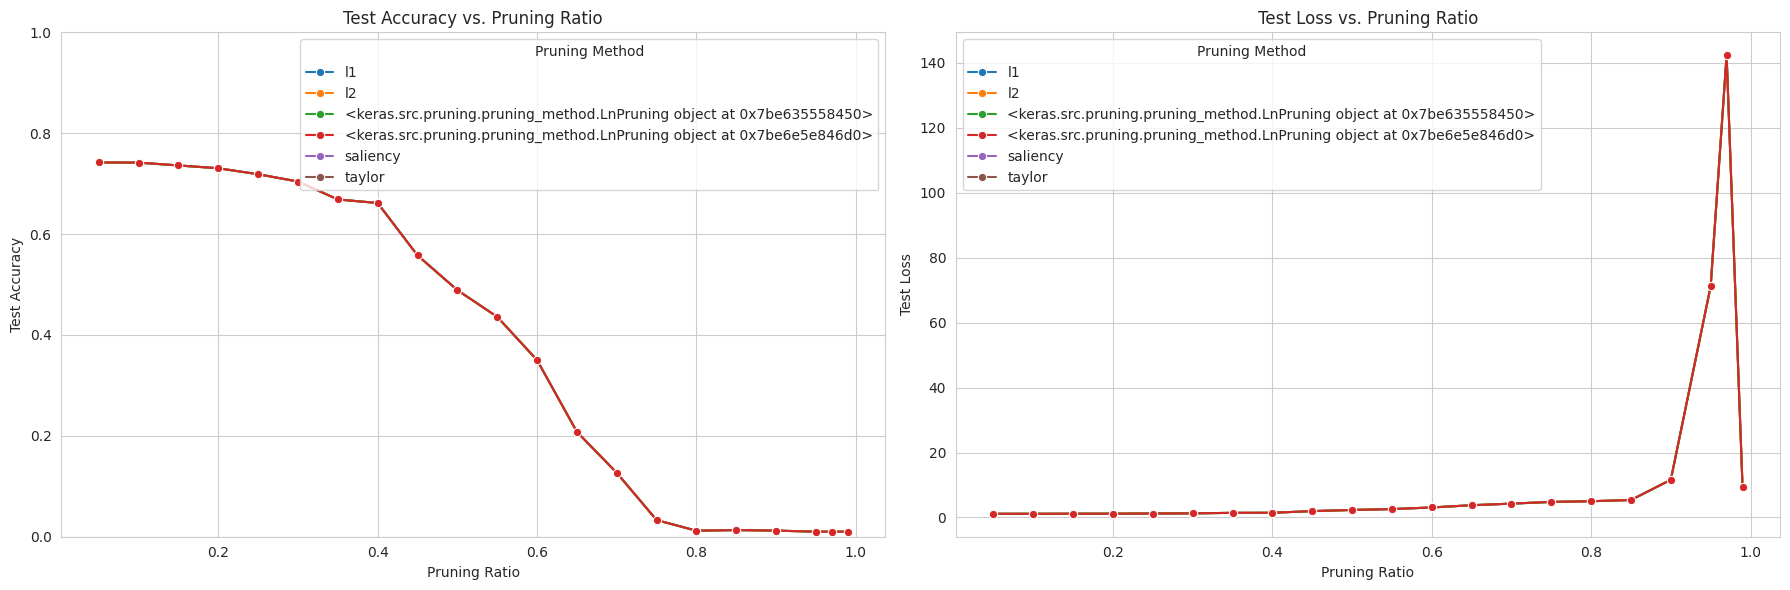

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot Test Accuracy
sns.lineplot(data=results_df, x='Pruning Ratio', y='Test Accuracy', hue='Pruning Method', marker='o', ax=axes[0])
axes[0].set_title('Test Accuracy vs. Pruning Ratio')
axes[0].set_xlabel('Pruning Ratio')
axes[0].set_ylabel('Test Accuracy')
axes[0].set_ylim(0, 1) # Set y-axis limit for accuracy between 0 and 1
axes[0].legend(title='Pruning Method')

# Plot Test Loss
sns.lineplot(data=results_df, x='Pruning Ratio', y='Test Loss', hue='Pruning Method', marker='o', ax=axes[1])
axes[1].set_title('Test Loss vs. Pruning Ratio')
axes[1].set_xlabel('Pruning Ratio')
axes[1].set_ylabel('Test Loss')
# axes[1].set_ylim(0, 5) # Optional: set a reasonable y-limit for loss
axes[1].legend(title='Pruning Method')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()